## Análisis Exploratorio (EDA) de ingresos por día

Objetivo: Realizar análisis exploratiorio de datos para entender el conportamientos de los ingresos por día deteccion de patrones y outlier

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
import json

# Configuración visual para los gráficos
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

print("Librerías cargadas correctamente.")

Librerías cargadas correctamente.


In [41]:
# 1. Cargar el dataset
# Asegúrate de que el archivo esté en la misma carpeta o coloca la ruta completa
nombre_archivo = '../data/data_excesos.csv'  # <--- CAMBIA ESTO POR TU ARCHIVO REAL
df_main = pd.read_csv(nombre_archivo)
df_main.head(2)


,anio,mes,monto_sin_iva
0,2022,julio,-758.517241
1,2022,agosto,18681.706900


In [42]:
meses = {'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
         'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12}
df_main['mes_numero'] = df_main['mes'].map(meses)

df_main.head(2)

,anio,mes,monto_sin_iva,mes_numero
0,2022,julio,-758.517241,7
1,2022,agosto,18681.706900,8


In [43]:
df_main['fecha'] = df_main['mes_numero'].astype(str) + '-' + df_main['anio'].astype(str)
df_main.head(2)

,anio,mes,monto_sin_iva,mes_numero,fecha
0,2022,julio,-758.517241,7,7-2022
1,2022,agosto,18681.706900,8,8-2022


In [44]:
# 2. Conversión de fechas
df_main['fecha'] = pd.to_datetime(df_main['fecha'])

# 3. Verificación rápida
print(f"Rango de fechas: {df_main['fecha'].min()} a {df_main['fecha'].max()}")
display(df_main.head())

Rango de fechas: 2022-07-01 00:00:00 a 2025-11-01 00:00:00


C:\Users\victor.briones\AppData\Local\Temp\ipykernel_4308\2259288153.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_main['fecha'] = pd.to_datetime(df_main['fecha'])


,anio,mes,monto_sin_iva,mes_numero,fecha
0,2022,julio,-758.517241,7,2022-07-01
1,2022,agosto,18681.706900,8,2022-08-01
2,2022,septiembre,261325.379300,9,2022-09-01
3,2022,octubre,353934.879300,10,2022-10-01
4,2022,noviembre,557951.525900,11,2022-11-01


In [51]:
df_main.to_csv('../data/data_excesos_procesado.csv', index=False)

#### Estadistica descriptiva

In [45]:
df_main.describe().round(2)


,anio,monto_sin_iva,mes_numero,fecha
count,41.00,41.00,41.00,41
mean,2023.68,813314.58,6.80,2024-03-01 13:27:48.292683008
min,2022.00,-758.52,1.00,2022-07-01 00:00:00
25%,2023.00,626064.98,4.00,2023-05-01 00:00:00
50%,2024.00,960387.51,7.00,2024-03-01 00:00:00
75%,2025.00,1013457.22,10.00,2025-01-01 00:00:00
max,2025.00,1290762.40,12.00,2025-11-01 00:00:00
std,1.04,303921.99,3.41,NaN


#### Visualización historica

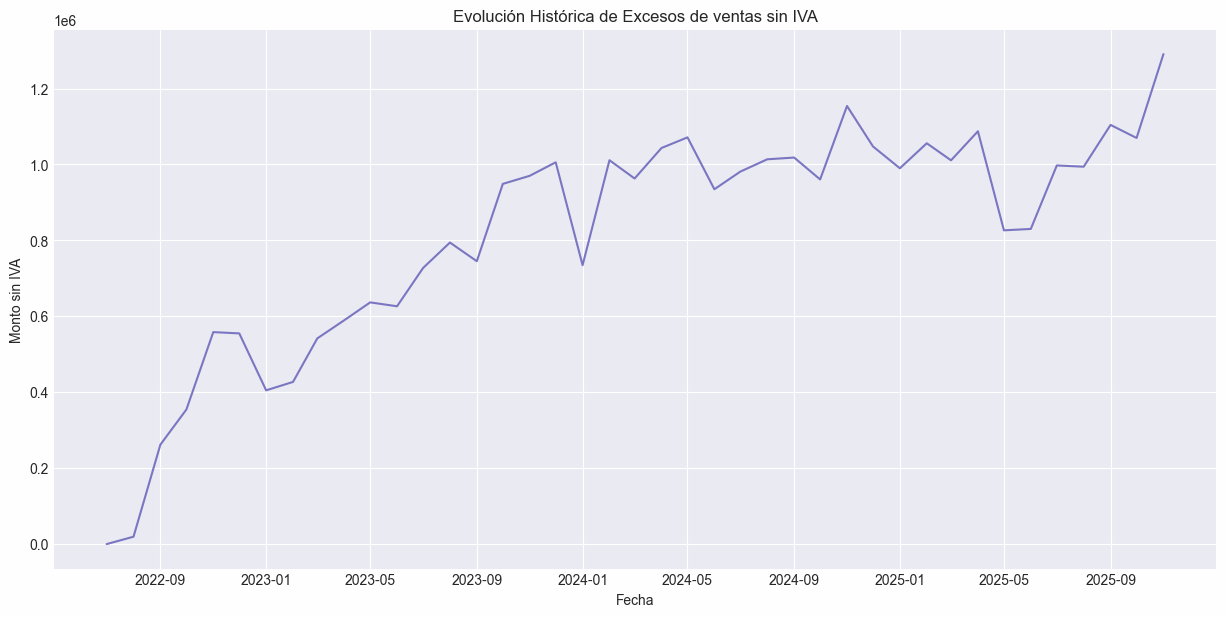

In [49]:
# Agrupamos por fecha y tipo para graficar
df_plot = df_main.groupby(['fecha'])['monto_sin_iva'].sum().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(data=df_plot, x='fecha', y='monto_sin_iva')
plt.title('Evolución Histórica de Excesos de ventas sin IVA')
plt.ylabel('Monto sin IVA')
plt.xlabel('Fecha')
plt.show()

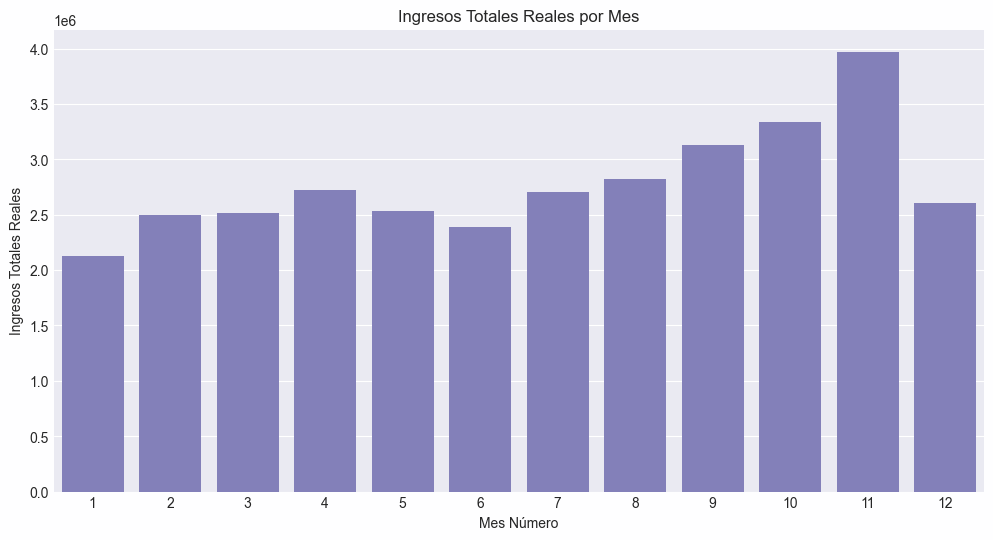

In [47]:
# agrupar ingresos_totales_reales por mes_numero
plt.figure(figsize=(12, 6))
ventas_mensuales = df_main.groupby('mes_numero')['monto_sin_iva'].sum().reset_index()
sns.barplot(data=ventas_mensuales, x='mes_numero', y='monto_sin_iva')
plt.title('Ingresos Totales Reales por Mes')
plt.xlabel('Mes Número')
plt.ylabel('Ingresos Totales Reales')
plt.show()

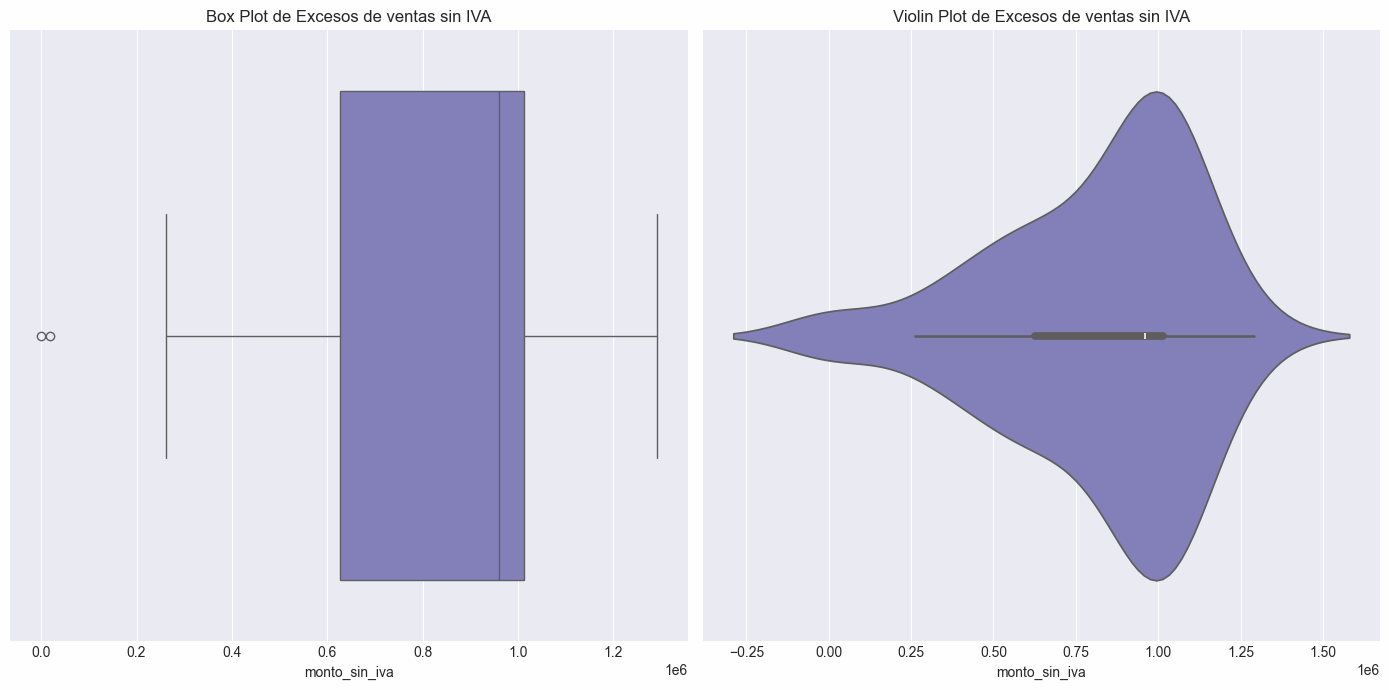

In [50]:
plt.figure(figsize=(14, 7))

# Gráfico de cajas
plt.subplot(1, 2, 1)
sns.boxplot(x=df_main['monto_sin_iva'])
plt.title('Box Plot de Excesos de ventas sin IVA')

# Diagrama de violín
plt.subplot(1, 2, 2)
sns.violinplot(x=df_main['monto_sin_iva'])
plt.title('Violin Plot de Excesos de ventas sin IVA')

plt.tight_layout()
plt.show()